In [66]:
!streamlit run accueil.py

^C


In [19]:
import json

# Chaîne de caractères représentant le contenu JSON brut
json_string = '''
{
    "artistes_preferes": [
        "rihanna",
        "psy",
        "lujipeka",
        "Taylor Swift",
        "Ed Sheeran",
        "Ariana Grande",
        "Shawn Mendes",
        "Billie Eilish",
        "Queen",
        "The Beatles",
        "Led Zeppelin",
        "Coldplay",
        "Foo Fighters",
        "Kendrick Lamar",
        "Drake",
        "Eminem",
        "Kanye West",
        "Jay-Z",
        "Calvin Harris",
        "David Guetta",
        "Marshmello",
        "Martin Garrix",
        "Avicii",
        "Beyoncé",
        "Frank Ocean",
        "Alicia Keys",
        "Bruno Mars",
        "The Weeknd",
        "Bob Marley",
        "Damian Marley",
        "Sean Paul",
        "Ziggy Marley",
        "Shaggy",
        "Johnny Cash",
        "Dolly Parton",
        "Willie Nelson",
        "Carrie Underwood",
        "Luke Bryan",
        "Louis Armstrong",
        "Miles Davis",
        "Ella Fitzgerald",
        "John Coltrane",
        "Duke Ellington",
        "Ludwig van Beethoven",
        "Wolfgang Amadeus Mozart",
        "Johann Sebastian Bach",
        "Franz Schubert",
        "Frédéric Chopin",
        "Arctic Monkeys",
        "Tame Impala",
        "The Black Keys",
        "Vampire Weekend",
        "Alt-J",
        "Metallica",
        "Iron Maiden",
        "Black Sabbath",
        "Slipknot",
        "Judas Priest",
        "Bob Dylan",
        "Joan Baez",
        "Simon & Garfunkel",
        "Joni Mitchell",
        "Mumford & Sons",
        "B.B. King",
        "Eric Clapton",
        "Muddy Waters",
        "John Lee Hooker",
        "Stevie Ray Vaughan",
        "Daddy Yankee",
        "J Balvin",
        "Bad Bunny",
        "Ozuna",
        "Don Omar",
        "BTS",
        "BLACKPINK",
        "EXO",
        "TWICE",
        "Red Velvet",
        "Fela Kuti",
        "Buena Vista Social Club",
        "Ravi Shankar",
        "Salif Keita",
        "Ali Farka Touré"
    ],
    "titres_preferes": [
        "au dd",
        "sayan",
        "blinding lights"
    ]
}
'''

# Charger le JSON
data = json.loads(json_string)


## Création apprentissage KMEANS

In [65]:
# Authentifier l'application
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

client_id = 'b6d0752f35624904aa09b8ab4c06d5b1'
client_secret = 'debdca7f8ec94ebf922263bfa071db9d'

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)


# Fonction pour récupérer les genres des artistes
def get_artist_genres(artist_name):
    results = sp.search(q='artist:' + artist_name, type='artist')
    if results['artists']['items']:
        genres = results['artists']['items'][0]['genres']
        return genres
    else:
        return None

# Récupérer les genres des artistes préférés
artistes_preferes = data['artistes_preferes']
genres_artistes = {}
for artiste in artistes_preferes:
    genres = get_artist_genres(artiste)
    if genres:
        genres_artistes[artiste] = genres


In [21]:
genres_artistes

{'rihanna': ['barbadian pop', 'pop', 'urban contemporary'],
 'psy': ['k-rap', 'korean old school hip hop'],
 'lujipeka': ['french hip hop', 'rap calme'],
 'Taylor Swift': ['pop'],
 'Ed Sheeran': ['pop', 'singer-songwriter pop', 'uk pop'],
 'Ariana Grande': ['pop'],
 'Shawn Mendes': ['canadian pop', 'pop', 'viral pop'],
 'Billie Eilish': ['art pop', 'pop'],
 'Queen': ['classic rock', 'glam rock', 'rock'],
 'The Beatles': ['british invasion',
  'classic rock',
  'merseybeat',
  'psychedelic rock',
  'rock'],
 'Led Zeppelin': ['album rock', 'classic rock', 'hard rock', 'rock'],
 'Coldplay': ['permanent wave', 'pop'],
 'Foo Fighters': ['alternative metal',
  'alternative rock',
  'modern rock',
  'permanent wave',
  'post-grunge',
  'rock'],
 'Kendrick Lamar': ['conscious hip hop', 'hip hop', 'rap', 'west coast rap'],
 'Drake': ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap'],
 'Eminem': ['detroit hip hop', 'hip hop', 'rap'],
 'Kanye West': ['chicago rap', 'hip hop', 'rap'

In [15]:
import pandas as pd

In [22]:
# Liste de tous les genres uniques
unique_genres = sorted(list(set([genre for sublist in genres_artistes.values() for genre in sublist])))

# Création d'un DataFrame vide avec les genres uniques comme colonnes
df = pd.DataFrame(columns=unique_genres)

# Remplissage du DataFrame avec des zéros où les artistes ont le genre correspondant
for artist, artist_genres in genres_artistes.items():
    df.loc[artist] = [1 if genre in artist_genres else 0 for genre in unique_genres]

# Affichage du DataFrame
df.head()

,adult standards,african-american classical,afrobeat,afropop,album rock,alternative metal,alternative rock,american folk revival,arkansas country,art pop,...,uk americana,uk dance,uk doom metal,uk pop,urban contemporary,urbano latino,viral pop,vocal jazz,west coast rap,world
rihanna,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
psy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lujipeka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Taylor Swift,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ed Sheeran,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

                         adult standards  african-american classical  \
rihanna                                0                           0   
psy                                    0                           0   
lujipeka                               0                           0   
Taylor Swift                           0                           0   
Ed Sheeran                             0                           0   
...                                  ...                         ...   
Fela Kuti                              0                           0   
Buena Vista Social Club                0                           0   
Ravi Shankar                           0                           0   
Salif Keita                            0                           0   
Ali Farka Touré                        0                           0   

                         afrobeat  afropop  album rock  alternative metal  \
rihanna                         0        0           0    

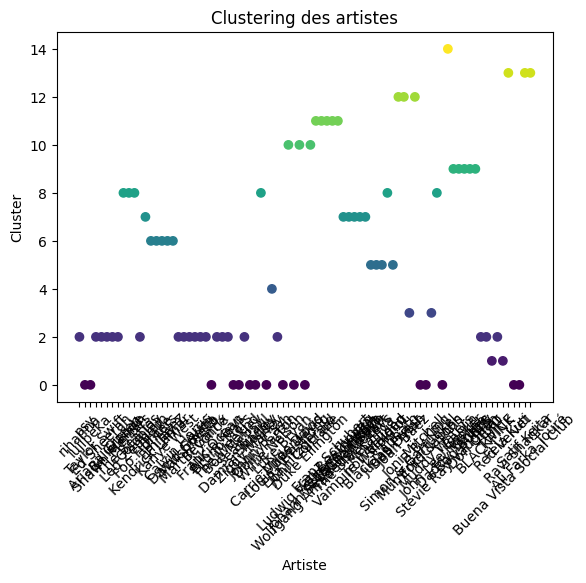

In [32]:
kmeans = KMeans(n_clusters=15, random_state=42)

# Ajuster le modèle aux données
kmeans.fit(df)

# Obtenir les étiquettes de cluster attribuées à chaque artiste
labels = kmeans.labels_

# Ajouter les étiquettes de cluster à la DataFrame des artistes
df["Cluster"] = labels

# Afficher les clusters
print(df)

# Visualisation des clusters
plt.scatter(df.index, df["Cluster"], c=labels, cmap='viridis')
plt.xlabel('Artiste')
plt.ylabel('Cluster')
plt.title('Clustering des artistes')
plt.xticks(rotation=45)  # Rotation des noms d'artiste pour une meilleure lisibilité
plt.show()

In [34]:
for artiste, cluster in df['Cluster'].items():
    print(f"{artiste} est dans le cluster {cluster}")

rihanna est dans le cluster 2
psy est dans le cluster 0
lujipeka est dans le cluster 0
Taylor Swift est dans le cluster 2
Ed Sheeran est dans le cluster 2
Ariana Grande est dans le cluster 2
Shawn Mendes est dans le cluster 2
Billie Eilish est dans le cluster 2
Queen est dans le cluster 8
The Beatles est dans le cluster 8
Led Zeppelin est dans le cluster 8
Coldplay est dans le cluster 2
Foo Fighters est dans le cluster 7
Kendrick Lamar est dans le cluster 6
Drake est dans le cluster 6
Eminem est dans le cluster 6
Kanye West est dans le cluster 6
Jay-Z est dans le cluster 6
Calvin Harris est dans le cluster 2
David Guetta est dans le cluster 2
Marshmello est dans le cluster 2
Martin Garrix est dans le cluster 2
Avicii est dans le cluster 2
Beyoncé est dans le cluster 2
Frank Ocean est dans le cluster 0
Alicia Keys est dans le cluster 2
Bruno Mars est dans le cluster 2
The Weeknd est dans le cluster 2
Bob Marley est dans le cluster 0
Damian Marley est dans le cluster 0
Sean Paul est dans

## New data

In [47]:
import pandas as pd

# Données d'entrée
input_data = {
    'rihanna': ['barbadian pop', 'pop', 'urban contemporary'],
    'psy': ['k-rap', 'korean old school hip hop'],
    'lujipeka': ['french hip hop', 'rap calme']
}

# Genres musicaux disponibles dans vos données d'origine
available_genres = list(df.columns)

# Créer une DataFrame pour stocker les données binaires
binary_data = pd.DataFrame(index=input_data.keys(), columns=available_genres)

# Remplir la DataFrame avec des zéros
binary_data = binary_data.fillna(0)

# Remplir la DataFrame avec des uns pour les genres possédés par chaque artiste
for artiste, genres in input_data.items():
    for genre in genres:
        if genre.lower() in binary_data.columns:
            binary_data.loc[artiste, genre.lower()] = 1



In [48]:
binary_data.head()

,adult standards,african-american classical,afrobeat,afropop,album rock,alternative metal,alternative rock,american folk revival,arkansas country,art pop,...,uk dance,uk doom metal,uk pop,urban contemporary,urbano latino,viral pop,vocal jazz,west coast rap,world,Cluster
rihanna,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
psy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lujipeka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
predicted_labels = kmeans.predict(binary_data)
predicted_labels

array([0, 0, 0])

In [73]:
ligne =df.loc['rihanna']
ligne = pd.DataFrame(ligne).T

In [75]:
predicted_labels = kmeans.predict(ligne)
predicted_labels

array([2])